# 1. Цель лабораторной работы: 
изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

# Задание:
1.Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.                                                                                 
2.Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:                                                                                      
i:масштабирование признаков (не менее чем тремя способами);                                
ii:обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);                                                                 
iii:обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);                                                          
iv:отбор признаков:                                                                                  
   --один метод из группы методов фильтрации (filter methods);                                      
   --один метод из группы методов обертывания (wrapper methods);                                      
   --один метод из группы методов вложений (embedded methods).

# 3. Ход выполнения работы
  Импорт библиотек

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [90]:
dataset_1=pd.read_csv('Mobile phone prices.csv')
dataset_1.info()
dataset_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


3.1 Масштабирование признаков

Методом Z-оценки:

In [91]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=dataset_1.columns)
    return res

In [92]:
cs1 = StandardScaler()
data_cs1_scaled_temp = cs1.fit_transform(dataset_1)
data_cs1_scaled =  arr_to_df(data_cs1_scaled_temp)
data_cs1_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,-1.341641
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,0.447214
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,1.341641
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,-1.341641


In [93]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

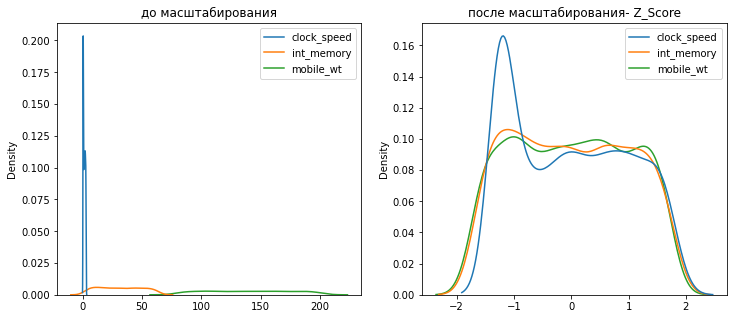

In [94]:
draw_kde(['clock_speed', 'int_memory', 'mobile_wt'], dataset_1, data_cs1_scaled, 'до масштабирования', 'после масштабирования- Z_Score')

In [95]:
cs2=MinMaxScaler()
data_cs2_scaled_temp=cs2.fit_transform(dataset_1)
data_cs2_scaled=arr_to_df(data_cs2_scaled_temp)
data_cs2_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,0.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,0.372771
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.250000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,0.750000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


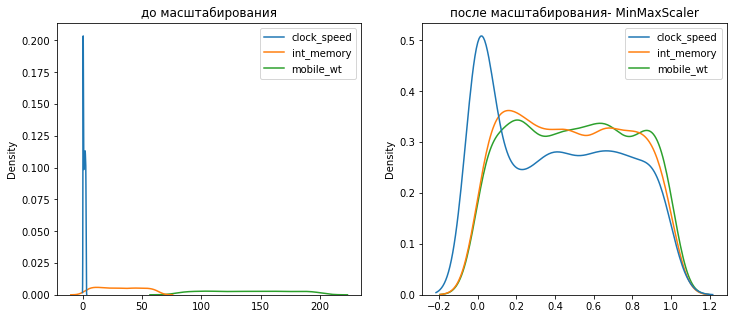

In [96]:
draw_kde(['clock_speed', 'int_memory', 'mobile_wt'], dataset_1, data_cs2_scaled, 'до масштабирования', 'после масштабирования- MinMaxScaler')

Методом RobustScaler

In [97]:
cs3=RobustScaler()
data_cs3_scaled_temp=cs3.fit_transform(dataset_1)
data_cs3_scaled=arr_to_df(data_cs3_scaled_temp)
data_cs3_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,0.016396,0.4950,0.014833,-0.490500,0.218250,-0.478500,0.001453,0.002917,-0.012311,0.130125,...,0.122059,0.005955,-0.012002,0.043786,0.109571,0.001100,-0.238500,-0.497000,-0.493000,7.660539e-18
std,0.575531,0.5001,0.544003,0.500035,0.723574,0.499662,0.567054,0.480693,0.580322,0.571959,...,0.667842,0.569996,0.584131,0.601892,0.622343,0.546396,0.426273,0.500116,0.500076,7.455424e-01
min,-0.949574,0.0000,-0.666667,-1.000000,-0.500000,-1.000000,-0.937500,-0.666667,-1.000000,-0.750000,...,-0.848758,-0.985163,-1.018040,-1.000000,-0.714286,-0.900000,-1.000000,-1.000000,-1.000000,-1.000000e+00
25%,-0.490177,0.0000,-0.533333,-1.000000,-0.333333,-1.000000,-0.500000,-0.500000,-0.524590,-0.250000,...,-0.423251,-0.490933,-0.505654,-0.428571,-0.428571,-0.500000,0.000000,-1.000000,-1.000000,-5.000000e-01
50%,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.509823,1.0000,0.466667,0.000000,0.666667,0.000000,0.500000,0.500000,0.475410,0.750000,...,0.576749,0.509067,0.494346,0.571429,0.571429,0.500000,0.000000,0.000000,0.000000,5.000000e-01
max,1.011133,1.0000,1.000000,0.000000,2.666667,0.000000,1.000000,0.833333,0.967213,1.000000,...,2.100828,0.990439,0.997038,1.000000,1.857143,0.900000,0.000000,0.000000,0.000000,1.000000e+00


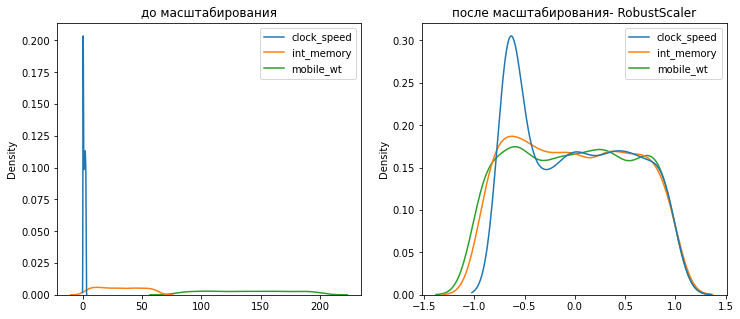

In [98]:
draw_kde(['clock_speed', 'int_memory', 'mobile_wt'], dataset_1, data_cs3_scaled, 'до масштабирования', 'после масштабирования- RobustScaler')

3.2 Обработка выбросов для числовых признаков

Удаление выборсов

In [99]:
import scipy.stats as stats

In [100]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

Посмотреть исходное изображение

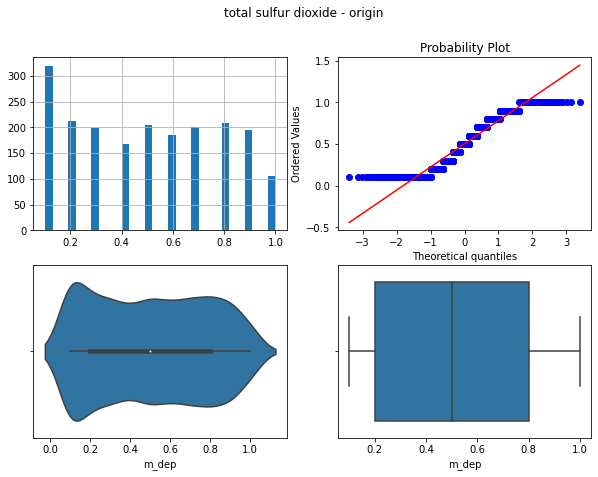

In [101]:
diagnostic_plots(dataset_1,'m_dep','total sulfur dioxide - origin')

In [102]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [103]:
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary  

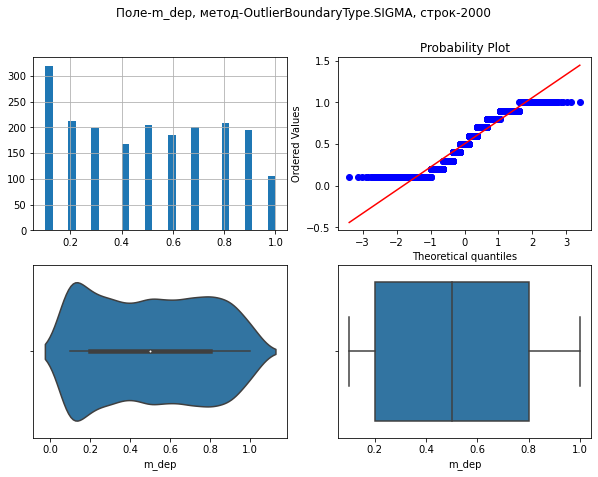

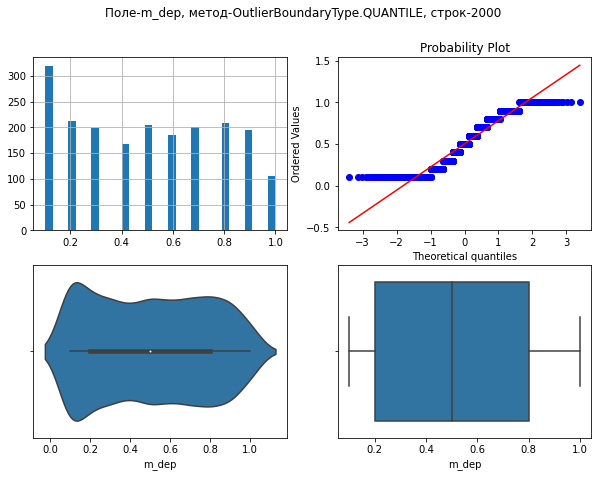

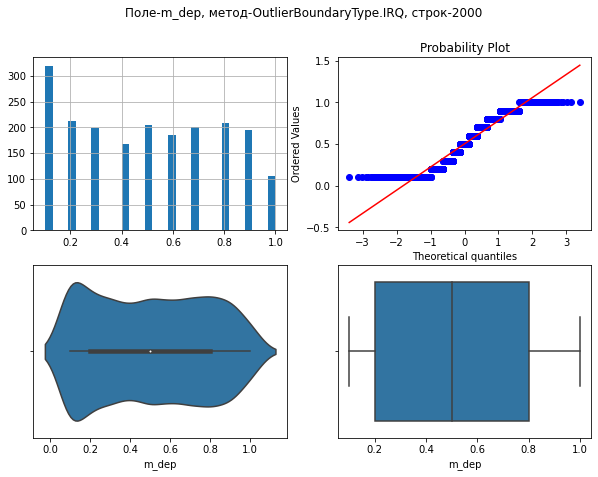

In [104]:
for obt in OutlierBoundaryType:
    lower_boundary, upper_boundary = get_outlier_boundaries(dataset_1, 'm_dep', obt)
        # Флаги для удаления выбросов
    outliers_temp = np.where(dataset_1['m_dep'] > upper_boundary, True, 
                np.where(dataset_1['m_dep'] < lower_boundary, True, False))
        # Удаление данных на основе флага
    data_trimmed = dataset_1.loc[~(outliers_temp), ]  
    title = 'Поле-{}, метод-{}, строк-{}'.format('m_dep', obt, data_trimmed.shape[0])
    diagnostic_plots(data_trimmed, 'm_dep', title)

Замена выбросов

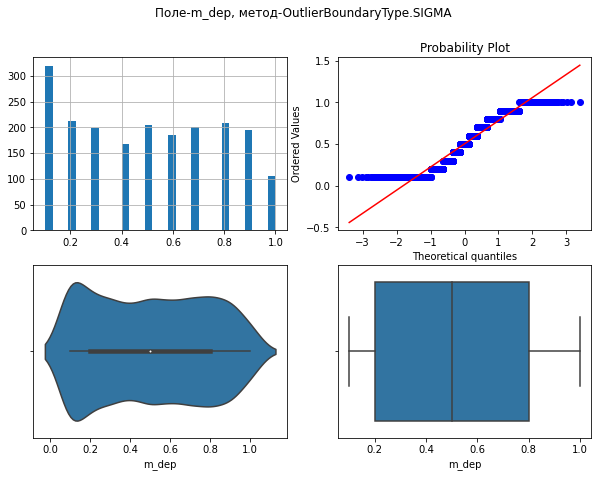

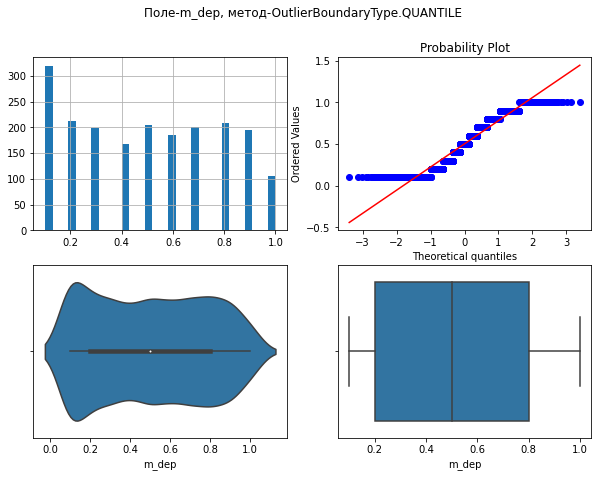

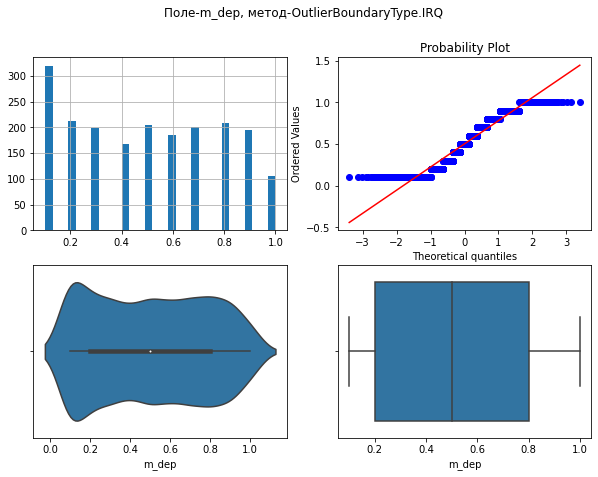

In [105]:
for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(dataset_1, 'm_dep', obt)
        # Изменение данных
        dataset_1['m_dep'] = np.where(dataset_1['m_dep'] > upper_boundary, upper_boundary, 
                                 np.where(dataset_1['m_dep'] < lower_boundary, lower_boundary, dataset_1['m_dep']))
        title = 'Поле-{}, метод-{}'.format('m_dep', obt)
        diagnostic_plots(dataset_1, 'm_dep', title)

3.3 Обработка по крайней мере одного нестандартного признака

In [106]:
import datetime

Импорт нового набора данных

In [107]:
dataset_2=pd.read_csv('avocado.csv')
dataset_2.info()
dataset_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [108]:
dataset_2['Date'] = dataset_2.apply(lambda x: pd.to_datetime(x['Date'], format='%Y-%m-%d'), axis=1)

In [109]:
# День
dataset_2['day'] = dataset_2['Date'].dt.day
# Месяц
dataset_2['month'] = dataset_2['Date'].dt.month
# Год
dataset_2['year'] = dataset_2['Date'].dt.year
#Неделя года
dataset_2['week'] = dataset_2['Date'].dt.isocalendar().week
#День недели 
dataset_2['dayofweek'] = dataset_2['Date'].dt.dayofweek
#Выходной день
dataset_2['day_name'] = dataset_2['Date'].dt.day_name()
dataset_2['is_holiday'] = dataset_2.apply(lambda x: 1 if x['Date'].dayofweek in [5,6] else 0, axis=1)

In [110]:
dataset_2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month,week,dayofweek,day_name,is_holiday
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,52,6,Sunday,1
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,51,6,Sunday,1
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,50,6,Sunday,1
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,49,6,Sunday,1
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,48,6,Sunday,1


Разрыв во времени до настоящего времени

In [111]:
dataset_2['now'] = datetime.datetime.today()
dataset_2['diff'] = dataset_2['now'] - dataset_2['Date']
dataset_2.dtypes

Unnamed: 0                int64
Date             datetime64[ns]
AveragePrice            float64
Total Volume            float64
4046                    float64
4225                    float64
4770                    float64
Total Bags              float64
Small Bags              float64
Large Bags              float64
XLarge Bags             float64
type                     object
year                      int64
region                   object
day                       int64
month                     int64
week                     UInt32
dayofweek                 int64
day_name                 object
is_holiday                int64
now              datetime64[ns]
diff            timedelta64[ns]
dtype: object

In [112]:
dataset_2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,year,region,day,month,week,dayofweek,day_name,is_holiday,now,diff
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,2015,Albany,27,12,52,6,Sunday,1,2022-06-01 18:33:55.335599,2348 days 18:33:55.335599
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,2015,Albany,20,12,51,6,Sunday,1,2022-06-01 18:33:55.335599,2355 days 18:33:55.335599
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,2015,Albany,13,12,50,6,Sunday,1,2022-06-01 18:33:55.335599,2362 days 18:33:55.335599
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,2015,Albany,6,12,49,6,Sunday,1,2022-06-01 18:33:55.335599,2369 days 18:33:55.335599
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,2015,Albany,29,11,48,6,Sunday,1,2022-06-01 18:33:55.335599,2376 days 18:33:55.335599


3.4 Отбор признаков
                                                                                          

Отбор признаков из группы методов фильтрации (Методы, основанные на статистических характеристиках (univariate feature selection))

In [113]:
X_filter=dataset_1.drop(labels=['price_range'],axis=1)
y_filter=dataset_1.price_range

In [114]:
X_filter.shape

(2000, 20)

In [115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

Text(0, 0.5, 'Взаимная информация')

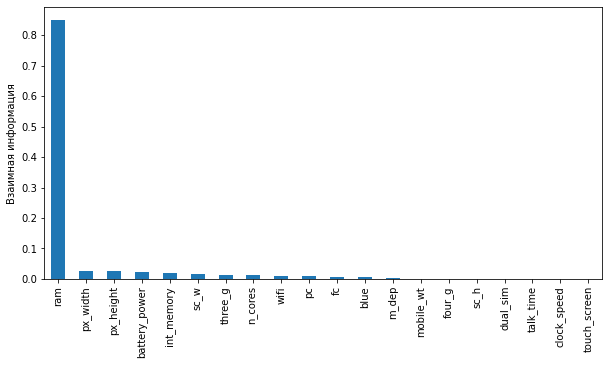

In [116]:
mi = mutual_info_classif(X_filter,y_filter)
mi = pd.Series(mi)
mi.index = X_filter.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [117]:
selector=SelectKBest(mutual_info_classif,k=5)
selector.fit(X_filter,y_filter)
X_filter_selected=selector.transform(X_filter)
X_filter_selected.shape

(2000, 5)

In [118]:
selector.get_support(indices=False)

array([ True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False])

In [119]:
X_filter.columns[selector.get_support()]

Index(['battery_power', 'clock_speed', 'px_height', 'px_width', 'ram'], dtype='object')

Отбор признаков из группы методов обертывания (алгоритм полного перебора)

In [120]:
!pip install mlxtend

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
knn = KNeighborsClassifier(n_neighbors=3)
X_wrapper=dataset_1.drop(labels=['price_range'],axis=1)
y_wrapper=dataset_1.price_range
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_wrapper, y_wrapper, custom_feature_names=X_wrapper.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 3000/6175IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Отбор признаков из группы методов вложения (Линейный классификатор на основе SVM)

In [122]:
from sklearn.svm import LinearSVC
X_embedded=dataset_1.drop(labels=['price_range'],axis=1)
y_embedded=dataset_1.price_range
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X_embedded, y_embedded)
# Коэффициенты регрессии
e_lr2.coef_

array([[-5.63762862e-04,  0.00000000e+00,  1.34206628e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.65060502e-03,  0.00000000e+00,  8.95799996e-03,
         7.56259993e-02,  1.32150702e-02, -5.85914422e-04,
        -6.12720079e-05, -1.62338232e-03,  5.60322749e-02,
         0.00000000e+00,  1.84545132e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-4.12186229e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.05568247e-04,  0.00000000e+00, -6.19302281e-05,
        -1.71103217e-02,  1.55357825e-04,  6.08054815e-05,
        -3.45546552e-05, -1.90572934e-04, -1.08063190e-04,
        -3.06869325e-03,  5.27392071e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.30094159e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.10284057e-03,  0.00000000e+00,
        -3.46265856e-03,  0.00000000e+00, -5.03073412e-04,
         0.00000000e+00, -4.2

In [123]:
from sklearn.feature_selection import SelectFromModel
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X_embedded, y_embedded)
sel_e_lr2.get_support()
X_embedded.columns[sel_e_lr2.get_support()]

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
       'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time'],
      dtype='object')

In [ ]:
import os
print(os.path.)